# Kenny Huang, Danny Hong, Arthur Skok

**Assignment**:

Grab a binary classification dataset from UCI or other repository. Divide your data into roughly 80% train, 10% validation, 10% test. Implement logistic regression with stochastic gradient descent as the optimization algorithm.

Implement SGD without regularization and report your % correct on the test dataset.

Implement SGD with regularization, select the best lambda parameter using the validation dataset, and report your % correct on the test dataset.

Plot the likelihood function with respect to iterations for unregularized and regularized on one set of axes. Which one converges to a higher likelihood, and why?

Optional, advanced things to try:
- Implement SGD with the L-1 penalty and use it for feature selection (it is not that hard actually)
- Compare SGD to Newton-Raphson by plotting the likelihood of both on one set of axes and explain why they are different.

# Implementation

In [ ]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import sys
from numpy.linalg import inv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn import datasets
%matplotlib inline

#Uploading Diabetes Dataset from sklearn
diabetes = datasets.load_diabetes()
X = diabetes.data[:, :2].astype(np.float32)
Y = []
Y2 = diabetes.target
for i in Y2:
    if i== 0:
        Y.append(1)
    else:
        Y.append(0)

x_train, x_tmp, y_train, y_tmp = train_test_split(X,Y, test_size= 0.2)
x_test, x_val, y_test, y_val = train_test_split(x_tmp, y_tmp, test_size=0.5)

# Sigmoid Function
def sigmoid_function(value):
  return 1.0/(1 + np.exp(-value))

# Log Likelihood Function
def log_likelihood_function(x_train, y_train, betas):
  value = np.dot(x_train, betas)
  log_likelihood = np.sum(y_train * value - np.log(1 + np.exp(value)))
  return log_likelihood

# SGD Unregularized Form Function
def SGD_unregularized_logistic_regression(x_train, y_train, x_test, y_test, learning_rate, step_size):
  betas = np.zeros(x_train.shape[1])
  likelihood_list = []
  for step in range(step_size):
    value = np.dot(x_train, betas)  # z
    predict = sigmoid_function(value) # g(z)
    gradient = np.dot(x_train.T, (y_train - predict))
    betas += (learning_rate*gradient)
    likelihood_list.append(log_likelihood_function(x_train, y_train, betas))
  output_hat = sigmoid_function(x_test @ betas.T)
  accuracy = output_hat.mean()
  return accuracy, likelihood_list, betas

# SGD Regularized Form Function
def SGD_regularized_logistic_regression(x_train, y_train, x_test, y_test, learning_rate, step_size, lambd):
  betas = np.zeros(x_train.shape[1])
  likelihood_list = []
  for step in range(step_size):
    value = np.dot(x_train, betas)
    predict = sigmoid_function(value) 
    gradient = np.dot(x_train.T, (y_train - predict))
    betas = betas + (learning_rate*gradient) - (lambd * betas)
    likelihood_list.append(log_likelihood_function(x_train, y_train, betas))
  output_hat = sigmoid_function(x_test @ betas.T)
  accuracy = output_hat.mean()
  return accuracy, likelihood_list, betas

# Optimal Lambda Function
def optimal_lambda_function(x_train, y_train, x_validation, y_validation, learning_rate, step_size):
  lambd_list = [0.0001, 0.0004, 0.0007, 0.001, 0.004, 0.007, 0.01, 0.04, 0.07, 0.1, 0.4, 0.7]
  accuracy_list = []
  for index in range(12):
    accuracy, likelihood_list, betas = SGD_regularized_logistic_regression(x_train, y_train, x_validation, y_validation, learning_rate, step_size, lambd_list[index])
    accuracy_list.append(accuracy)
  best_accuracy = max(accuracy_list)
  optimal_lambd = lambd_list[accuracy_list.index(best_accuracy)]
  print("For SGD with regularization, the optimal lambda is: ", optimal_lambd, " with an optimal accuracy of: ", best_accuracy * 100, "%")
  return optimal_lambd, best_accuracy

For SGD with regularization, the optimal lambda is:  0.0001  with an optimal accuracy of:  50.00643540426969 %
For SGD without regularization, the optimal accuracy is:  50.002205952733725 %


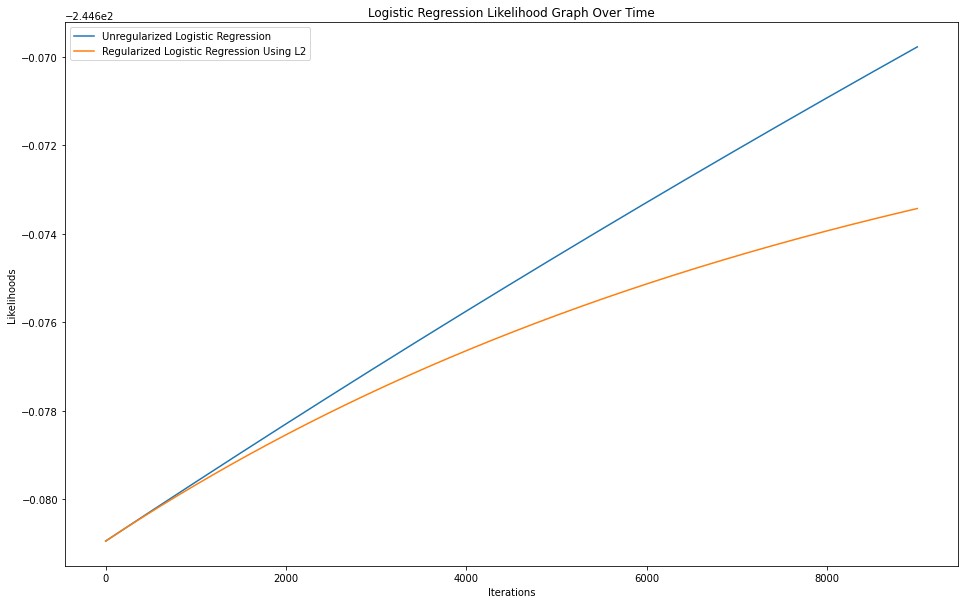

In [ ]:
# Unregularized SGD
acc1, likes_list1, betas1 = SGD_unregularized_logistic_regression(x_train, y_train, x_test, y_test, 5e-5, 9000)

# Regularized SGD
best_lambd, best_acc = optimal_lambda_function(x_train, y_train, x_val, y_val, 5e-5, 9000)
acc2, likes_list2, betas2 = SGD_regularized_logistic_regression(x_train, y_train, x_test, y_test, 5e-5, 9000, best_lambd)
print("For SGD without regularization, the optimal accuracy is: ", acc2 * 100, "%")

figure, axis = plt.subplots(figsize=[16,10])
axis.plot(range(len(likes_list1)), likes_list1, label = "Unregularized Logistic Regression")
axis.plot(range(len(likes_list2)), likes_list2, label = "Regularized Logistic Regression Using L2")

plt.title("Logistic Regression Likelihood Graph Over Time")
plt.ylabel("Likelihoods")
plt.xlabel("Iterations")

plt.legend()
plt.show()